
## Exploration

Continue in your classification_exercises.ipynb notebook. Use the iris dataset.

1. Split data into train (70%) & test (30%) samples.

In [1]:
import pandas as pd
import numpy as np
import scipy as sp

import acquire
import prepare

from sklearn.model_selection import train_test_split

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = acquire.get_iris_data()

In [5]:
df.drop(columns=['measurement_id'], inplace=True)
df.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species_name    0
species_id      0
dtype: int64

1. Split data into train (70%) & test (30%) samples.

In [7]:
train, test = train_test_split(
    df, test_size=.70, random_state=123, stratify=df[['species_id']])

2. Create a swarmplot using a melted dataframe of all your numeric variables. The x-axis is the variable name, the y-axis is the measure. Add another dimension using color to represent species. Document takeaways from this visualization.

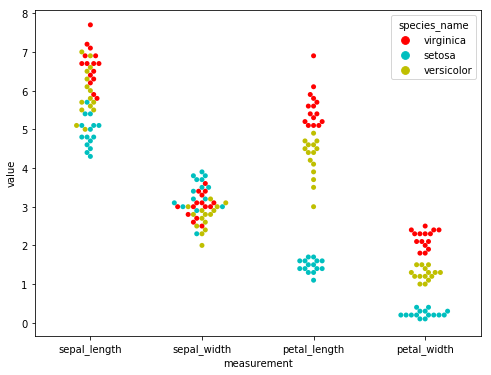

In [10]:
# "Melt" the dataset to "long-form" representation
df_melt = pd.melt(train[['sepal_length','sepal_width','petal_length', 'petal_width', 'species_name']], 
                  "species_name", var_name="measurement")

plt.figure(figsize=(8,6))
# Draw a categorical scatterplot to show each observation
p = sns.swarmplot(x="measurement", y="value", hue="species_name",
              palette=["r", "c", "y"], data=df_melt)

plt.show()


3. Create 4 subplots (2 rows x 2 columns) of scatterplots. Make your figure size 14 x 8. What are your takeaways?

    - sepal_length x sepal_width
    - petal_length x petal_width
    - sepal_area x petal_area
    - sepal_length x petal_length


In [23]:
d = {'sepal_area': train.sepal_length * train.sepal_width,
    'petal_area': train.petal_length * train.petal_width}
frames = [train, pd.DataFrame(data=d)]
train = pd.concat(frames, sort=True)

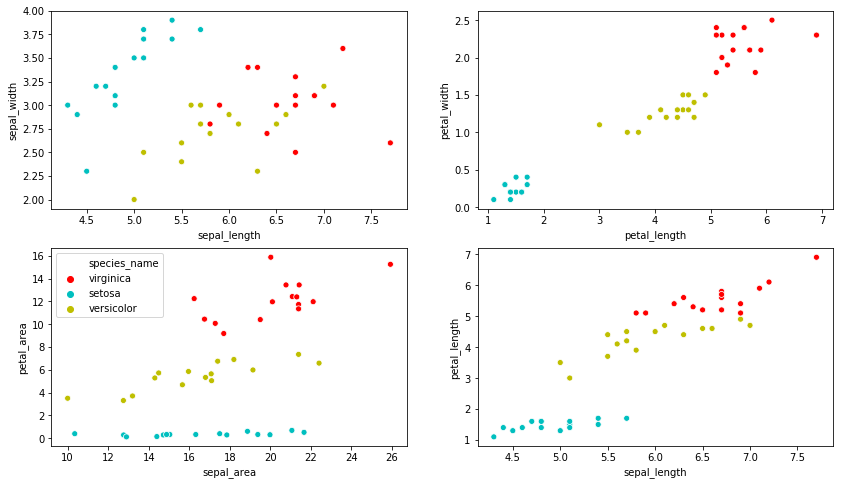

In [37]:
_, ax = plt.subplots(nrows=2, ncols=2, figsize=(14,8))

# plot the first subplot
plt.subplot(221)
sns.scatterplot(x='sepal_length', y='sepal_width', hue='species_name',
              palette=["r", "c", "y"], data=train, legend=False)

# the second subplot
plt.subplot(222)
sns.scatterplot(x='petal_length', y='petal_width', hue='species_name',
              palette=["r", "c", "y"], data=train, legend=False)

# the third subplot
plt.subplot(223)
sns.scatterplot(x='sepal_area', y='petal_area', hue='species_name',
              palette=["r", "c", "y"], data=train)

# the fourth subplot
plt.subplot(224)
sns.scatterplot(x='sepal_length', y='petal_length', hue='species_name',
              palette=["r", "c", "y"], data=train, legend=False)

plt.show()

**Takeaways:**

- Sepal area isn't indicative but petal area definitely is.  
- Sepal width and sepal length are both somewhat indicative drivers.  
- Use petal_area, sepal_width, and sepal_length  


4. Create a heatmap of each variable layering correlation coefficient on top.

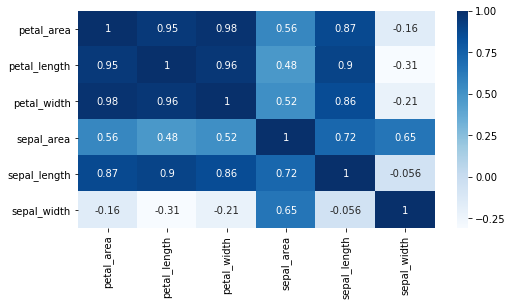

In [40]:
plt.figure(figsize=(8,4))
sns.heatmap(train.drop(columns=['species_name','species_id']).corr(), cmap='Blues', annot=True)


5. Create a scatter matrix visualizing the interaction of each variable

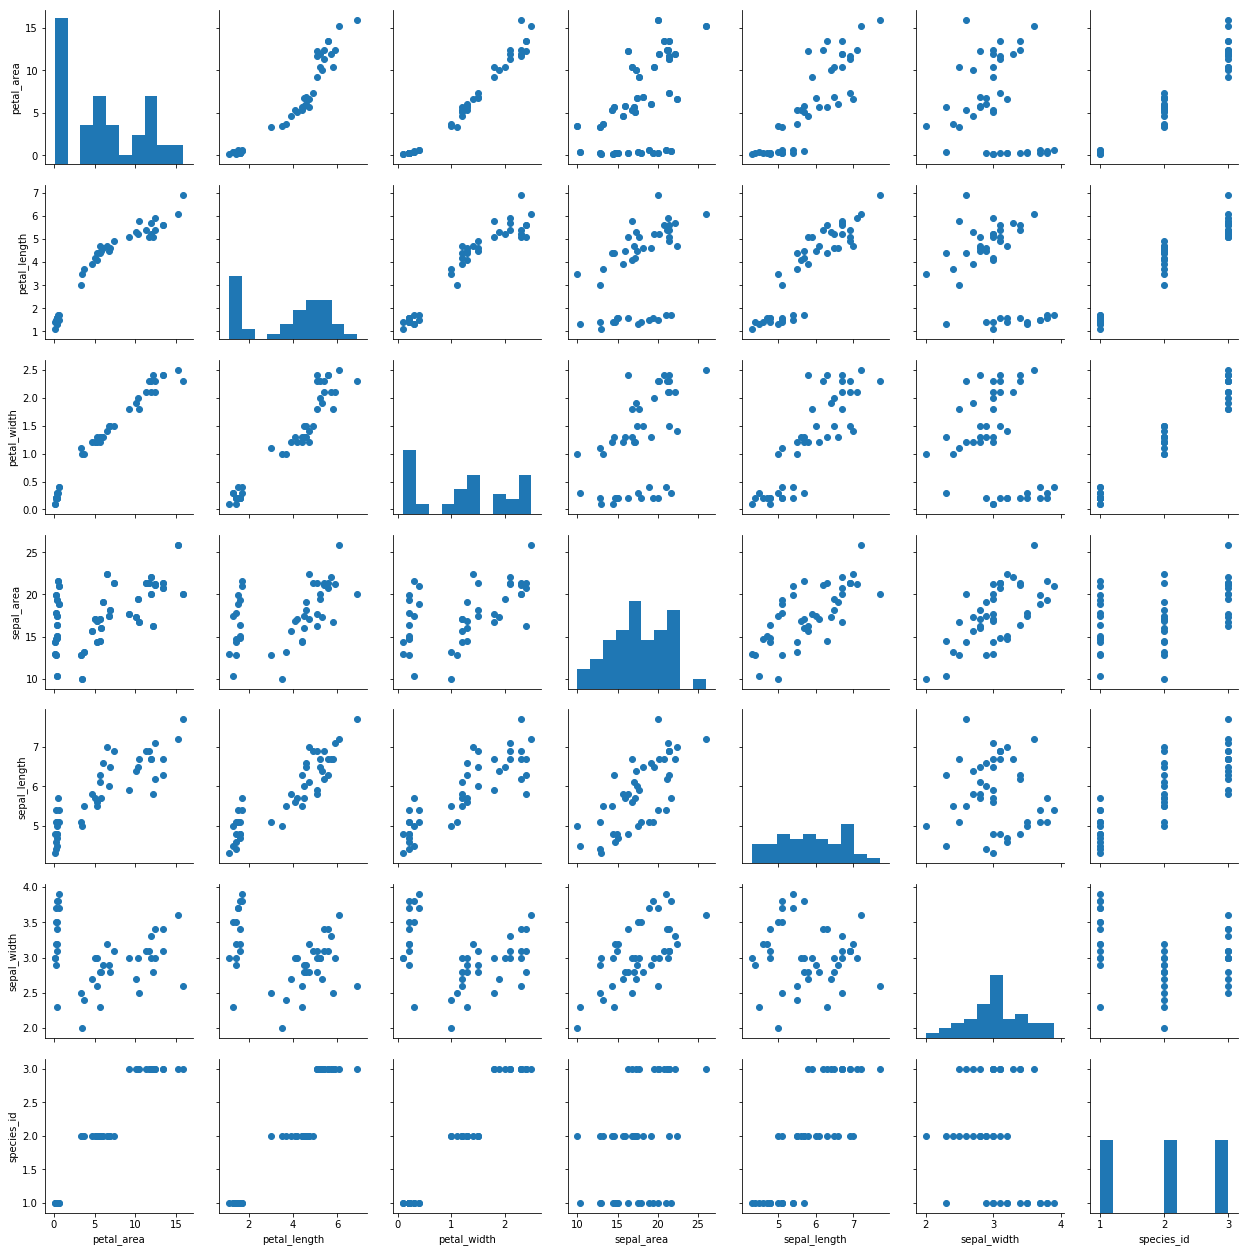

In [43]:
g = sns.PairGrid(train.drop(columns=['species_name']))
g.map_diag(plt.hist)
g.map_offdiag(plt.scatter)
plt.show()

6. Is the sepal length significantly different in virginica compared to versicolor? Run an experiment to test this.  

    - null hypothesis: the difference in sepal length between virginica and versicolor is insignificant.  
    - alternative hypothesis: the difference in sepal length between virginica and versicolor is substantial.  
    - We will test if the sepal length of virginica is significantly different than that of the versicolor. If there is difference, then variable sepal_length is a good choice to keep as a feature. We can use a t-test here, as sepal_length is somewhat normally distributed.

In [45]:
sp.stats.ttest_ind(
    train[train.species_name == 'virginica'].sepal_length.dropna(),
    train[train.species_name == 'versicolor'].sepal_length.dropna())

Ttest_indResult(statistic=3.4232016971185018, pvalue=0.0019237724882713316)

We reject the null hypothesis that there is no significant difference between sepal length between virginica and versicolor species. 